In [6]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:

df = pd.read_csv('./Brain_GSE50161.csv')


label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

X = df.drop(columns=['type'])
y = df['type']

selector = SelectKBest(score_func=f_classif, k=100)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_selected)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


✅ Test Accuracy: 92.31%

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3
           4       0.75      1.00      0.86         3

    accuracy                           0.92        26
   macro avg       0.93      0.93      0.92        26
weighted avg       0.94      0.92      0.92        26



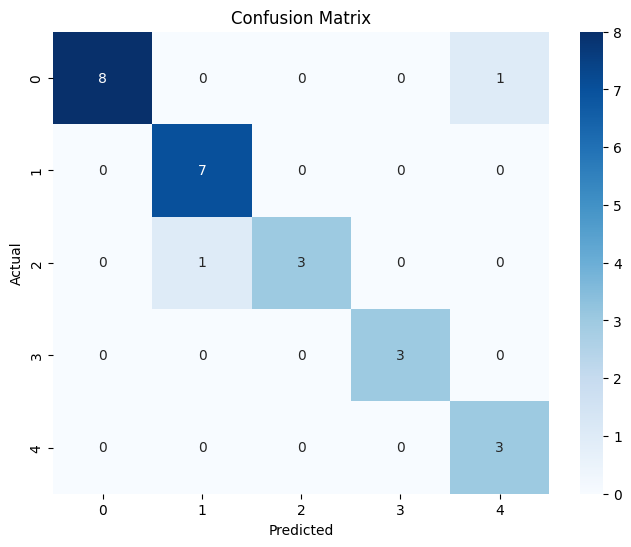

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")

target_names = [str(cls) for cls in label_encoder.classes_]
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


📈 Cross-validation scores: [0.73076923 0.65384615 0.84615385 0.73076923 0.57692308]
📌 Mean CV Accuracy: 70.77%


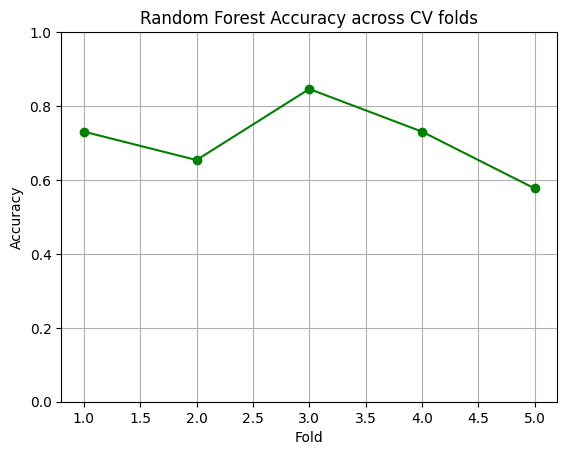

In [5]:
cv_scores = cross_val_score(rf_model, X_scaled, y_encoded, cv=5)
print(f"📈 Cross-validation scores: {cv_scores}")
print(f"📌 Mean CV Accuracy: {cv_scores.mean() * 100:.2f}%")

plt.plot(range(1, 6), cv_scores, marker='o', color='green')
plt.title('Random Forest Accuracy across CV folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()
